In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [107]:
df = pd.read_csv(r'D:\University\IMT\Python Codes\Whole sale customer\Wholesalecustomers.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [109]:
df['Channel'] = df['Channel'].astype('category')
df['Region'] = df['Region'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


In [110]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [111]:
df_encoded = pd.get_dummies(df, columns = ['Channel', 'Region'])

In [112]:
df_encoded.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [113]:
df_encoded = df_encoded.astype(int)
df_encoded.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [114]:
df_encoded = df_encoded.rename(columns={'Channel_1': 'Channel_Horeca', 'Channel_2': 'Channel_Retail', 'Region_1': 'Region_Lisbon', 'Region_2': 'Region_Oporto', 'Region_3': 'Region_Other'})

In [115]:
df_encoded.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Horeca,Channel_Retail,Region_Lisbon,Region_Oporto,Region_Other
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [116]:
df_encoded.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
Channel_Horeca      0
Channel_Retail      0
Region_Lisbon       0
Region_Oporto       0
Region_Other        0
dtype: int64

In [117]:
df_encoded.duplicated().sum()

np.int64(0)

In [118]:
corr = df_encoded.corr()

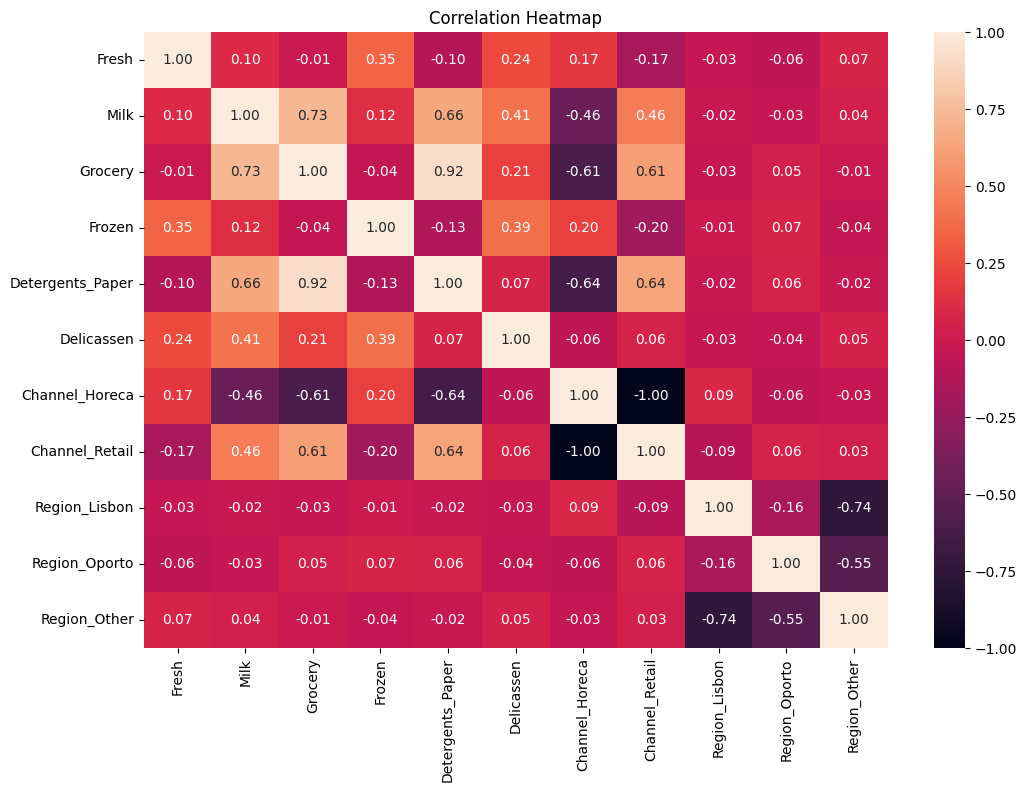

In [119]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [120]:
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

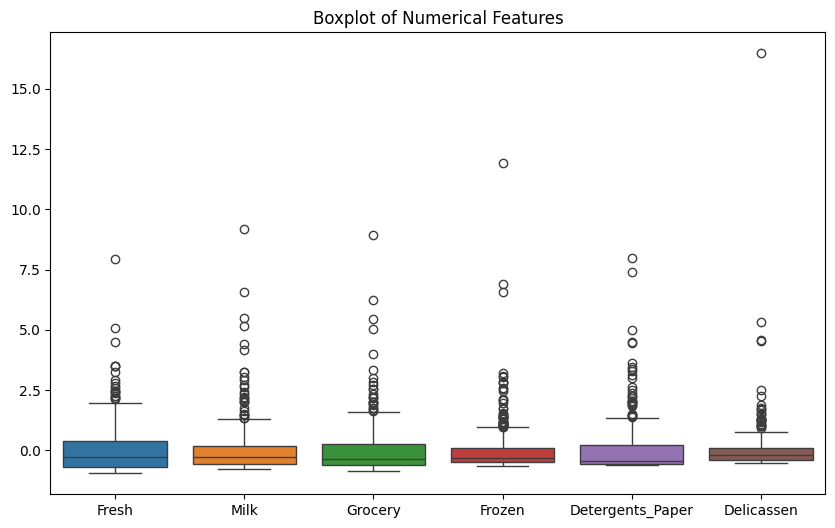

In [121]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_encoded[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.title('Boxplot of Numerical Features')
plt.show()

In [122]:
def remove_outliers(df,columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound,lower_bound, df[col]) 
        df[col] = np.where(df[col] > upper_bound,upper_bound, df[col])
    return df

In [123]:
df_encoded = remove_outliers(df_encoded, numerical_columns)

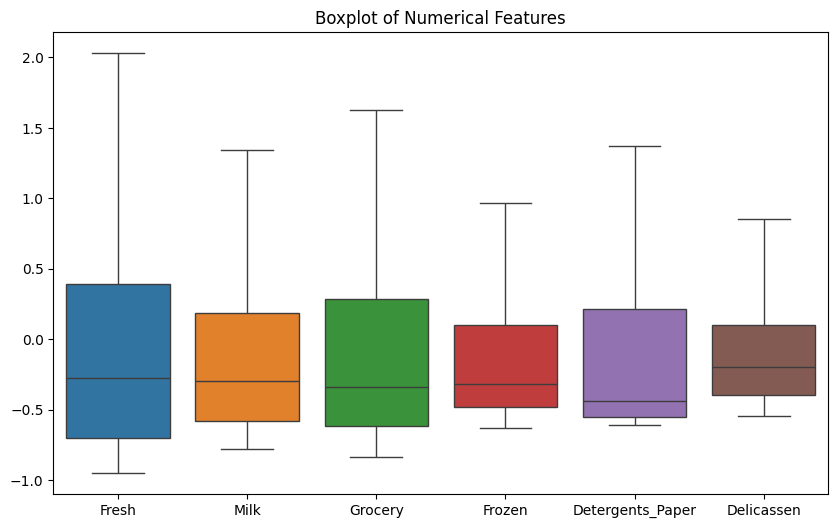

In [124]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_encoded[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.title('Boxplot of Numerical Features')
plt.show()

In [125]:
sse=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)

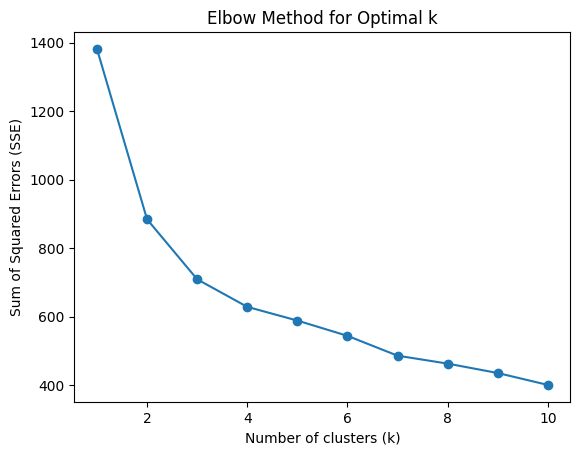

In [126]:
plt.plot(range(1,11),sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [127]:
kmeans_elbow = KMeans(n_clusters=3, random_state=42)
kmeans_elbow.fit(df_encoded)


KMeans(n_clusters=3, random_state=42)

In [128]:
labels_elbow = kmeans_elbow.predict(df_encoded)

In [130]:
df_encoded['cluster_elbow'] = labels_elbow

<Axes: xlabel='Fresh', ylabel='Milk'>

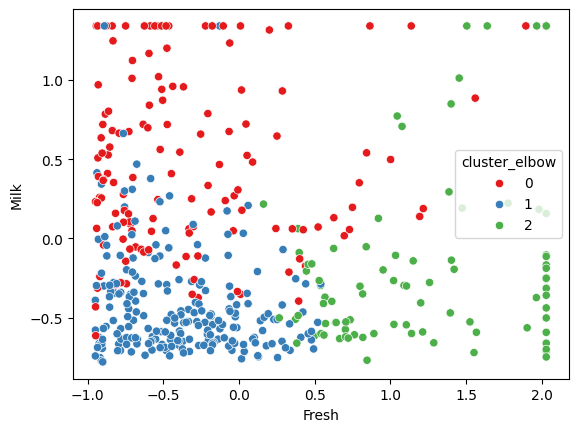

In [131]:
sns.scatterplot(x='Fresh', y='Milk', hue='cluster_elbow', data=df_encoded, palette='Set1')